![example](images/director_shot.jpeg)

In [1]:
#(cimages/Movie_image.jpg)

# Microsoft Movie Analysis

**Author:** Bridget Coleman
***

## Overview

Microsoft is looking to expand into movies.  Given the type of company that Microsoft is, in addition to wanting to make a profit, it will need to satisfy shareholders.  I chose to analyze the potential movies from a 
financial aspect.  There can be benefits in small and large budget films.

## Business Problem

With so many companies currently in this area, Microsoft is looking for insight on the movies they should produce.  Using the data available I will look into the budgets, profits, and return on investment (ROI).


## Data Understanding

The data has been collected from well known movie sites such as IMDB (Internet Movie Database), Rotten Tomatoes, and TMDB (The Movie Database).  The information from these sites provides information from the movie industry as well as user and audience input.  The user input is mainly voting.  


In [2]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [3]:
imdb_title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
rt_movies = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
movie_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [4]:
imdb_title_basics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [5]:
rt_movies.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [6]:
movie_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [7]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation

From the movie budgets file I was able to pull information on the production budgets, domestic gross sales, and worldwide gross sales.  From this table, I converted those columns into integers so that I could calculate the additional information.  

The additional calculations that I performed where domestic profit, worldwide profit, domestic ROI and worldwide ROI.  As I analyzed the data, there were several outliers.  I will provide a chart to show which movies fell into this category.

By looking at ROI in addition to profit, Microsoft could find potential in small budget films instead of looking at "blockbuster" movies only.  


In [8]:
# Adjust the format of the release date
movie_budgets['release_year'] = movie_budgets['release_date'].str[-4:]

In [9]:
# Adjust the format of the release date
rt_movies['original_release_date'] = rt_movies['original_release_date'].str[:4]
rt_movies.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [10]:
# Adjust the format of the release date
rt_movies['original_release_date'] = rt_movies['original_release_date'].str[:4]
rt_movies.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [11]:
# Convert production budget to a float.  Production budget amounts are in thousands.
movie_budgets['production_budget'].astype(str)
movie_budgets['production_budget'] = movie_budgets['production_budget'].replace({'\$': '', ',': ''}, regex=True)
movie_budgets['production_budget'].astype(str)
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(float)

movie_budgets['production_budget'] = movie_budgets['production_budget']/1000

In [12]:
# Convert domestic gross to a float.  Domestic gross amounts are in thousands.
movie_budgets['domestic_gross'].astype(str)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].replace({'\$': '', ',': ''}, regex=True)
movie_budgets['domestic_gross'].astype(str)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype(float)

movie_budgets['domestic_gross'] = (movie_budgets['domestic_gross'])/1000

In [13]:
movie_budgets['domestic_profit'] = movie_budgets['domestic_gross'] - movie_budgets['production_budget']

In [14]:
movie_budgets['worldwide_gross'].astype(str)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True)
movie_budgets['worldwide_gross'].astype(str)

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [15]:
# Convert worldwide gross to an integer.  
integers = []
for idx in movie_budgets.index:
    integers.append(int(movie_budgets.worldwide_gross[idx]))
movie_budgets['worldwide_gross'] = integers

In [16]:
#Worldwide gross in thousands.

movie_budgets.worldwide_gross = movie_budgets.worldwide_gross/1000
movie_budgets.worldwide_gross

0       2776345.279
1       1045663.875
2        149762.350
3       1403013.963
4       1316721.747
           ...     
5777          0.000
5778        240.495
5779          1.338
5780          0.000
5781        181.041
Name: worldwide_gross, Length: 5782, dtype: float64

In [17]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   release_year       5782 non-null   object 
 7   domestic_profit    5782 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 361.5+ KB


In [18]:
movie_budgets['worldwide_profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [19]:
# Worldwide and domestic ROI calculations.

movie_budgets['worldwide_ROI'] = (movie_budgets['worldwide_profit'] / movie_budgets['production_budget'])
movie_budgets['domestic_ROI'] = (movie_budgets['domestic_profit'] / movie_budgets['production_budget'])
movie_budgets.set_index('id')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_profit,worldwide_profit,worldwide_ROI,domestic_ROI
id,,,,,,,,,,
1,"Dec 18, 2009",Avatar,425000.0,760507.625,2776345.279,2009,335507.625,2351345.279,5.532577,0.789430
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600.0,241063.875,1045663.875,2011,-169536.125,635063.875,1.546673,-0.412899
3,"Jun 7, 2019",Dark Phoenix,350000.0,42762.350,149762.350,2019,-307237.650,-200237.650,-0.572108,-0.877822
4,"May 1, 2015",Avengers: Age of Ultron,330600.0,459005.868,1403013.963,2015,128405.868,1072413.963,3.243841,0.388403
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000.0,620181.382,1316721.747,2017,303181.382,999721.747,3.153696,0.956408
...,...,...,...,...,...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7.0,0.000,0.000,2018,-7.000,-7.000,-1.000000,-1.000000
79,"Apr 2, 1999",Following,6.0,48.482,240.495,1999,42.482,234.495,39.082500,7.080333
80,"Jul 13, 2005",Return to the Land of Wonders,5.0,1.338,1.338,2005,-3.662,-3.662,-0.732400,-0.732400


In [20]:
movie_budgets = movie_budgets[['release_date', 'release_year', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', \
                               'domestic_profit', 'worldwide_profit', \
                              'domestic_ROI', 'worldwide_ROI']]
movie_budgets.head()

,release_date,release_year,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_ROI,worldwide_ROI
0,"Dec 18, 2009",2009,Avatar,425000.0,760507.625,2776345.279,335507.625,2351345.279,0.789430,5.532577
1,"May 20, 2011",2011,Pirates of the Caribbean: On Stranger Tides,410600.0,241063.875,1045663.875,-169536.125,635063.875,-0.412899,1.546673
2,"Jun 7, 2019",2019,Dark Phoenix,350000.0,42762.350,149762.350,-307237.650,-200237.650,-0.877822,-0.572108
3,"May 1, 2015",2015,Avengers: Age of Ultron,330600.0,459005.868,1403013.963,128405.868,1072413.963,0.388403,3.243841
4,"Dec 15, 2017",2017,Star Wars Ep. VIII: The Last Jedi,317000.0,620181.382,1316721.747,303181.382,999721.747,0.956408,3.153696


In [21]:
movie_budgets = movie_budgets.drop(['release_date'], axis=1)

In [22]:
# Combine tables to have budgets and voting information.
budget_votes = pd.merge(movie_budgets, rt_movies,\
                        left_on=['release_year', 'movie'], right_on=['original_release_date', 'movie_title'], how='left')
budget_votes.head()

,release_year,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_ROI,worldwide_ROI,rotten_tomatoes_link,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,2009,Avatar,425000.0,760507.625,2776345.279,335507.625,2351345.279,0.789430,5.532577,m/avatar,...,20th Century Fox,Certified-Fresh,82.0,317.0,Upright,82.0,1382566.0,63.0,259.0,58.0
1,2011,Pirates of the Caribbean: On Stranger Tides,410600.0,241063.875,1045663.875,-169536.125,635063.875,-0.412899,1.546673,m/pirates_of_the_caribbean_on_stranger_tides,...,Walt Disney Pictures,Rotten,33.0,277.0,Spilled,54.0,199739.0,52.0,91.0,186.0
2,2019,Dark Phoenix,350000.0,42762.350,149762.350,-307237.650,-200237.650,-0.877822,-0.572108,m/dark_phoenix,...,20th Century Fox,Rotten,22.0,370.0,NaN,64.0,15452.0,44.0,82.0,288.0
3,2015,Avengers: Age of Ultron,330600.0,459005.868,1403013.963,128405.868,1072413.963,0.388403,3.243841,m/avengers_age_of_ultron,...,Walt Disney Pictures,Certified-Fresh,76.0,367.0,Upright,83.0,288708.0,61.0,279.0,89.0
4,2017,Star Wars Ep. VIII: The Last Jedi,317000.0,620181.382,1316721.747,303181.382,999721.747,0.956408,3.153696,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Clean budget and vote table.

budget_votes = budget_votes.drop(['rotten_tomatoes_link', 'production_company', 'tomatometer_rating', 'tomatometer_count', 'tomatometer_top_critics_count', \
                                 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'movie_title', 'directors', 'authors', 'actors', \
                                 'original_release_date', 'streaming_release_date', 'critics_consensus', 'content_rating', 'movie_info'], axis=1)

In [24]:
budget_votes.head()

,release_year,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_ROI,worldwide_ROI,genres,runtime,tomatometer_status,audience_status,audience_rating,audience_count
0,2009,Avatar,425000.0,760507.625,2776345.279,335507.625,2351345.279,0.789430,5.532577,"Action & Adventure, Comedy, Mystery & Suspense...",155.0,Certified-Fresh,Upright,82.0,1382566.0
1,2011,Pirates of the Caribbean: On Stranger Tides,410600.0,241063.875,1045663.875,-169536.125,635063.875,-0.412899,1.546673,"Action & Adventure, Comedy, Science Fiction & ...",136.0,Rotten,Spilled,54.0,199739.0
2,2019,Dark Phoenix,350000.0,42762.350,149762.350,-307237.650,-200237.650,-0.877822,-0.572108,"Action & Adventure, Drama, Science Fiction & F...",114.0,Rotten,NaN,64.0,15452.0
3,2015,Avengers: Age of Ultron,330600.0,459005.868,1403013.963,128405.868,1072413.963,0.388403,3.243841,"Action & Adventure, Science Fiction & Fantasy",141.0,Certified-Fresh,Upright,83.0,288708.0
4,2017,Star Wars Ep. VIII: The Last Jedi,317000.0,620181.382,1316721.747,303181.382,999721.747,0.956408,3.153696,NaN,NaN,NaN,NaN,NaN,NaN


## Data Modeling
I used scatter plots to compare budgets to domestic profit and budgets to worldwide profit.  This allowed me to get an overall view of the movie industry.  This also allowed to recognize outliers.  Based on the scatter plots, the majority of movies have budgets under $100,000,000.  The outliers mainly occurred with budgets over $300,000,000. 

If the focus was only on profit, Microsoft would only consider big budget movies with established franchises and fan bases.  This is why I also chose to look at ROI.  There are smaller budget options that have potential.  When I examined movies with the greatest ROI,  I started to consider the release dates.  I selected the top 15 movies with the greatest ROI.  Almost half of the movies on the list were released over forty years ago.  This list may provide options for possible updates to those movies.  I then chose to examine movies that were released in the last twenty years.


In [25]:
# 15 most profitable domestic films.
domestic_top_15_profit = movie_budgets.sort_values('domestic_profit', ascending=False).drop(['worldwide_gross', 'domestic_ROI',\
                                                                                            'worldwide_profit', 'worldwide_ROI'],\
                                                                                           axis=1).head(15)

In [26]:
#15 most profitable worldwide films.
worldwide_top_15_profit = movie_budgets.sort_values('worldwide_profit', ascending=False).drop(['domestic_gross',\
                                                                                               'domestic_ROI', 'domestic_profit',\
                                                                                               'worldwide_ROI'], axis=1).head(15)
worldwide_top_15_profit

,release_year,movie,production_budget,worldwide_gross,worldwide_profit
0,2009,Avatar,425000.0,2776345.279,2351345.279
42,1997,Titanic,200000.0,2208208.395,2008208.395
6,2018,Avengers: Infinity War,300000.0,2048134.200,1748134.200
5,2015,Star Wars Ep. VII: The Force Awakens,306000.0,2053311.220,1747311.220
33,2015,Jurassic World,215000.0,1648854.864,1433854.864
66,2015,Furious 7,190000.0,1518722.794,1328722.794
26,2012,The Avengers,225000.0,1517935.897,1292935.897
260,2011,Harry Potter and the Deathly Hallows: Part II,125000.0,1341693.157,1216693.157
41,2018,Black Panther,200000.0,1348258.224,1148258.224
112,2018,Jurassic World: Fallen Kingdom,170000.0,1305772.799,1135772.799


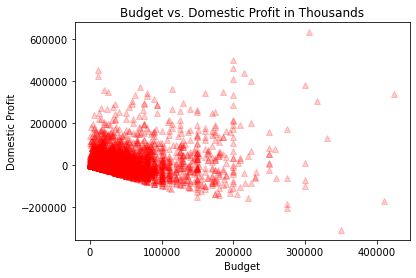

In [27]:
plt.scatter(movie_budgets['production_budget'], movie_budgets['domestic_profit'], c='r', \
                   marker = '^', alpha = .2)
plt.xlabel('Budget')
plt.ylabel('Domestic Profit')
plt.title('Budget vs. Domestic Profit in Thousands')
plt.savefig('Domestic_Profit.png');

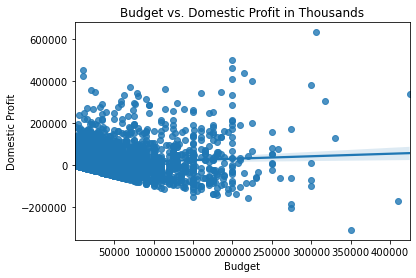

In [28]:
sns.regplot(movie_budgets['production_budget'], movie_budgets['domestic_profit'])
plt.xlabel('Budget')
plt.ylabel('Domestic Profit')
plt.title('Budget vs. Domestic Profit in Thousands')
plt.savefig('Domestic_Profit_regression.png');

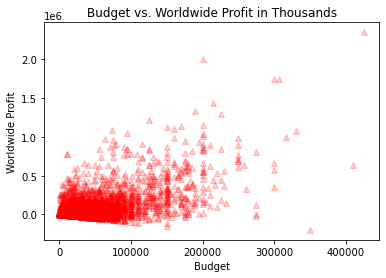

In [29]:
plt.scatter(movie_budgets['production_budget'], movie_budgets['worldwide_profit'], c='r', marker = '^', alpha = .2)
plt.xlabel('Budget')
plt.ylabel('Worldwide Profit')
plt.title('Budget vs. Worldwide Profit in Thousands')
plt.savefig('Worldwide_Profit.png');

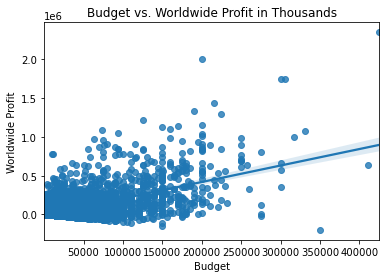

In [30]:
sns.regplot(movie_budgets['production_budget'], movie_budgets['worldwide_profit'])
plt.xlabel('Budget')
plt.ylabel('Worldwide Profit')
plt.title('Budget vs. Worldwide Profit in Thousands')
plt.savefig('Worldwide_Profit_regression.png');

In [31]:
# Additional information on budget outliers.  

budget_over_300M = budget_votes.loc[budget_votes['production_budget'] >= 300000]
budget_over_300M = budget_over_300M.sort_values('production_budget', ascending=False).drop(['runtime', 'tomatometer_status', 'audience_status'], axis=1)
budget_over_300M

,release_year,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_ROI,worldwide_ROI,genres,audience_rating,audience_count
0,2009,Avatar,425000.0,760507.625,2776345.279,335507.625,2351345.279,0.789430,5.532577,"Action & Adventure, Comedy, Mystery & Suspense...",82.0,1382566.0
1,2011,Pirates of the Caribbean: On Stranger Tides,410600.0,241063.875,1045663.875,-169536.125,635063.875,-0.412899,1.546673,"Action & Adventure, Comedy, Science Fiction & ...",54.0,199739.0
2,2019,Dark Phoenix,350000.0,42762.350,149762.350,-307237.650,-200237.650,-0.877822,-0.572108,"Action & Adventure, Drama, Science Fiction & F...",64.0,15452.0
3,2015,Avengers: Age of Ultron,330600.0,459005.868,1403013.963,128405.868,1072413.963,0.388403,3.243841,"Action & Adventure, Science Fiction & Fantasy",83.0,288708.0
4,2017,Star Wars Ep. VIII: The Last Jedi,317000.0,620181.382,1316721.747,303181.382,999721.747,0.956408,3.153696,NaN,NaN,NaN
5,2015,Star Wars Ep. VII: The Force Awakens,306000.0,936662.225,2053311.220,630662.225,1747311.220,2.060988,5.710167,NaN,NaN,NaN
6,2018,Avengers: Infinity War,300000.0,678815.482,2048134.200,378815.482,1748134.200,1.262718,5.827114,"Action & Adventure, Science Fiction & Fantasy",91.0,58720.0
7,2007,Pirates of the Caribbean: At Worldâs End,300000.0,309420.425,963420.425,9420.425,663420.425,0.031401,2.211401,NaN,NaN,NaN
8,2017,Justice League,300000.0,229024.295,655945.209,-70975.705,355945.209,-0.236586,1.186484,"Action & Adventure, Drama, Science Fiction & F...",71.0,127743.0
9,2015,Spectre,300000.0,200074.175,879620.923,-99925.825,579620.923,-0.333086,1.932070,Action & Adventure,61.0,105981.0


In [32]:
# Top 15 films with the gretest domestic ROI 

domestic_top_15_ROI = budget_votes.sort_values('domestic_ROI', ascending=False).drop(['domestic_gross', 'worldwide_gross',\
                                                                                       'domestic_profit', 'worldwide_profit',\
                                                                                       'runtime', 'tomatometer_status', \
                                                                                      'audience_status','worldwide_ROI'], axis=1).head(15)
domestic_top_15_ROI

,release_year,movie,production_budget,domestic_ROI,genres,audience_rating,audience_count
5746,1972,Deep Throat,25.0,1799.000000,NaN,NaN,NaN
5774,1993,El Mariachi,7.0,290.560000,"Action & Adventure, Art House & International,...",76.0,54751.0
5493,2009,Paranormal Activity,450.0,238.819578,"Horror, Mystery & Suspense",57.0,273989.0
5407,1999,The Blair Witch Project,600.0,233.231832,Horror,56.0,401984.0
5680,2015,The Gallows,100.0,226.644100,"Horror, Mystery & Suspense",22.0,13369.0
5716,1995,The Brothers McMullen,50.0,207.530120,"Comedy, Drama, Romance",60.0,6170.0
5666,1974,The Texas Chainsaw Massacre,140.0,188.803136,NaN,NaN,NaN
5710,2004,Super Size Me,65.0,176.374892,"Documentary, Special Interest",72.0,271856.0
5782,2005,My Date With Drew,1.1,163.582727,NaN,NaN,NaN
5373,1973,American Graffiti,777.0,147.005148,"Comedy, Drama",84.0,64618.0


In [33]:
#  Top 15 films with the gretest worldwide ROI

world_top_15_ROI = budget_votes.sort_values('worldwide_ROI', ascending=False).drop(['domestic_gross',\
                                                                                     'worldwide_gross', 'domestic_profit',\
                                                                                     'runtime', 'tomatometer_status', 'audience_status',\
                                                                                    'worldwide_profit', 'domestic_ROI'], axis=1).head(15)
world_top_15_ROI

,release_year,movie,production_budget,worldwide_ROI,genres,audience_rating,audience_count
5746,1972,Deep Throat,25.0,1799.000000,NaN,NaN,NaN
5614,1980,Mad Max,200.0,497.750000,NaN,NaN,NaN
5493,2009,Paranormal Activity,450.0,430.517853,"Horror, Mystery & Suspense",57.0,273989.0
5680,2015,The Gallows,100.0,415.564740,"Horror, Mystery & Suspense",22.0,13369.0
5407,1999,The Blair Witch Project,600.0,412.833333,Horror,56.0,401984.0
5710,2004,Super Size Me,65.0,341.058585,"Documentary, Special Interest",72.0,271856.0
5347,1942,Bambi,858.0,311.354312,"Animation, Classics, Kids & Family, Science Fi...",73.0,599817.0
5774,1993,El Mariachi,7.0,290.704000,"Action & Adventure, Art House & International,...",76.0,54751.0
5677,1968,Night of the Living Dead,114.0,262.921614,"Classics, Cult Movies, Horror",87.0,130598.0
5211,1976,Rocky,1000.0,224.000000,"Drama, Sports & Fitness",69.0,33403994.0


In [34]:
# Only movies released since 2000.

budget_votes['release_year'] = budget_votes['release_year'].astype(int)
ROI_2000 = budget_votes.loc[budget_votes['release_year'] >= 2000]
ROI_2000

,release_year,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_ROI,worldwide_ROI,genres,runtime,tomatometer_status,audience_status,audience_rating,audience_count
0,2009,Avatar,425000.0,760507.625,2776345.279,335507.625,2351345.279,0.789430,5.532577,"Action & Adventure, Comedy, Mystery & Suspense...",155.0,Certified-Fresh,Upright,82.0,1382566.0
1,2011,Pirates of the Caribbean: On Stranger Tides,410600.0,241063.875,1045663.875,-169536.125,635063.875,-0.412899,1.546673,"Action & Adventure, Comedy, Science Fiction & ...",136.0,Rotten,Spilled,54.0,199739.0
2,2019,Dark Phoenix,350000.0,42762.350,149762.350,-307237.650,-200237.650,-0.877822,-0.572108,"Action & Adventure, Drama, Science Fiction & F...",114.0,Rotten,NaN,64.0,15452.0
3,2015,Avengers: Age of Ultron,330600.0,459005.868,1403013.963,128405.868,1072413.963,0.388403,3.243841,"Action & Adventure, Science Fiction & Fantasy",141.0,Certified-Fresh,Upright,83.0,288708.0
4,2017,Star Wars Ep. VIII: The Last Jedi,317000.0,620181.382,1316721.747,303181.382,999721.747,0.956408,3.153696,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,2004,The Mongol King,7.0,0.900,0.900,-6.100,-6.100,-0.871429,-0.871429,NaN,NaN,NaN,NaN,NaN,NaN
5778,2018,Red 11,7.0,0.000,0.000,-7.000,-7.000,-1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
5780,2005,Return to the Land of Wonders,5.0,1.338,1.338,-3.662,-3.662,-0.732400,-0.732400,NaN,NaN,NaN,NaN,NaN,NaN
5781,2015,A Plague So Pleasant,1.4,0.000,0.000,-1.400,-1.400,-1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Domestic ROI - top 15 - released in 2000 or later.

domestic_top_15_ROI_2000 = ROI_2000.sort_values('domestic_ROI', ascending=False).drop(['domestic_gross', 'worldwide_gross',\
                                                                                       'domestic_profit', 'worldwide_profit',\
                                                                                       'worldwide_ROI'], axis=1).head(15)
domestic_top_15_ROI_2000

,release_year,movie,production_budget,domestic_ROI,genres,runtime,tomatometer_status,audience_status,audience_rating,audience_count
5493,2009,Paranormal Activity,450.0,238.819578,"Horror, Mystery & Suspense",86.0,Certified-Fresh,Spilled,57.0,273989.0
5680,2015,The Gallows,100.0,226.644100,"Horror, Mystery & Suspense",81.0,Rotten,Spilled,22.0,13369.0
5710,2004,Super Size Me,65.0,176.374892,"Documentary, Special Interest",98.0,Certified-Fresh,Upright,72.0,271856.0
5782,2005,My Date With Drew,1.1,163.582727,NaN,NaN,NaN,NaN,NaN,NaN
5508,2004,Napoleon Dynamite,400.0,110.352390,Comedy,86.0,Fresh,Upright,74.0,789850.0
5681,2006,Facing the Giants,100.0,100.783310,"Drama, Faith & Spirituality",111.0,Rotten,Upright,85.0,88232.0
5766,2001,Dayereh,10.0,66.378000,NaN,NaN,NaN,NaN,NaN,NaN
5429,2008,Fireproof,500.0,65.912634,Drama,122.0,Rotten,Upright,82.0,39765.0
5657,2007,Once,150.0,61.972380,"Drama, Musical & Performing Arts",86.0,Certified-Fresh,Upright,91.0,191047.0
5431,2004,Open Water,500.0,60.001764,"Art House & International, Drama, Horror, Myst...",79.0,Fresh,Spilled,33.0,55908.0


In [36]:
# Worldwide ROI - top 15 - released in 2000 or later.

worldwide_top_15_ROI_2000 = ROI_2000.sort_values('worldwide_ROI', ascending=False).drop(['domestic_gross', 'worldwide_gross',\
                                                                                       'domestic_profit', 'worldwide_profit',\
                                                                                       'domestic_ROI'], axis=1).head(15)
worldwide_top_15_ROI_2000

,release_year,movie,production_budget,worldwide_ROI,genres,runtime,tomatometer_status,audience_status,audience_rating,audience_count
5493,2009,Paranormal Activity,450.0,430.517853,"Horror, Mystery & Suspense",86.0,Certified-Fresh,Spilled,57.0,273989.0
5680,2015,The Gallows,100.0,415.564740,"Horror, Mystery & Suspense",81.0,Rotten,Spilled,22.0,13369.0
5710,2004,Super Size Me,65.0,341.058585,"Documentary, Special Interest",98.0,Certified-Fresh,Upright,72.0,271856.0
5782,2005,My Date With Drew,1.1,163.582727,NaN,NaN,NaN,NaN,NaN,NaN
5657,2007,Once,150.0,154.490873,"Drama, Musical & Performing Arts",86.0,Certified-Fresh,Upright,91.0,191047.0
5775,2004,Primer,7.0,119.275143,"Drama, Mystery & Suspense, Science Fiction & F...",78.0,Fresh,Upright,79.0,46477.0
5508,2004,Napoleon Dynamite,400.0,114.306783,Comedy,86.0,Fresh,Upright,74.0,789850.0
5431,2004,Open Water,500.0,110.037282,"Art House & International, Drama, Horror, Myst...",79.0,Fresh,Spilled,33.0,55908.0
5681,2006,Facing the Giants,100.0,101.431590,"Drama, Faith & Spirituality",111.0,Rotten,Upright,85.0,88232.0
5212,2012,The Devil Inside,1000.0,100.759490,Horror,83.0,Rotten,Spilled,22.0,45193.0


In [37]:
ROI_2010 = budget_votes.loc[budget_votes['release_year'] >= 2010]
ROI_2010

,release_year,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_ROI,worldwide_ROI,genres,runtime,tomatometer_status,audience_status,audience_rating,audience_count
1,2011,Pirates of the Caribbean: On Stranger Tides,410600.0,241063.875,1045663.875,-169536.125,635063.875,-0.412899,1.546673,"Action & Adventure, Comedy, Science Fiction & ...",136.0,Rotten,Spilled,54.0,199739.0
2,2019,Dark Phoenix,350000.0,42762.350,149762.350,-307237.650,-200237.650,-0.877822,-0.572108,"Action & Adventure, Drama, Science Fiction & F...",114.0,Rotten,NaN,64.0,15452.0
3,2015,Avengers: Age of Ultron,330600.0,459005.868,1403013.963,128405.868,1072413.963,0.388403,3.243841,"Action & Adventure, Science Fiction & Fantasy",141.0,Certified-Fresh,Upright,83.0,288708.0
4,2017,Star Wars Ep. VIII: The Last Jedi,317000.0,620181.382,1316721.747,303181.382,999721.747,0.956408,3.153696,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,Star Wars Ep. VII: The Force Awakens,306000.0,936662.225,2053311.220,630662.225,1747311.220,2.060988,5.710167,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,2014,Stories of Our Lives,15.0,0.000,0.000,-15.000,-15.000,-1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
5772,2015,Family Motocross,10.0,0.000,0.000,-10.000,-10.000,-1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
5773,2012,Newlyweds,9.0,4.584,4.584,-4.416,-4.416,-0.490667,-0.490667,Comedy,95.0,Fresh,Spilled,53.0,920.0
5778,2018,Red 11,7.0,0.000,0.000,-7.000,-7.000,-1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Domestic ROI - top 15 - released in 2010 or later.

domestic_top_15_ROI_2010 = ROI_2010.sort_values('domestic_ROI', ascending=False).drop(['domestic_gross', 'worldwide_gross',\
                                                                                       'domestic_profit', 'worldwide_profit',\
                                                                                       'worldwide_ROI'], axis=1).head(15)
domestic_top_15_ROI_2010

,release_year,movie,production_budget,domestic_ROI,genres,runtime,tomatometer_status,audience_status,audience_rating,audience_count
5680,2015,The Gallows,100.0,226.644100,"Horror, Mystery & Suspense",81.0,Rotten,Spilled,22.0,13369.0
5212,2012,The Devil Inside,1000.0,52.262945,Horror,83.0,Rotten,Spilled,22.0,45193.0
5190,2014,Godâs Not Dead,1150.0,51.831071,NaN,NaN,NaN,NaN,NaN,NaN
5063,2011,Insidious,1500.0,35.006100,Horror,101.0,Fresh,Upright,62.0,130807.0
4248,2017,Get Out,5000.0,34.208133,"Horror, Mystery & Suspense",104.0,Certified-Fresh,Upright,86.0,75461.0
5214,2015,Unfriended,1000.0,31.789645,"Horror, Mystery & Suspense",83.0,Fresh,Spilled,36.0,30213.0
4664,2010,Paranormal Activity 2,3000.0,27.250969,"Horror, Mystery & Suspense",91.0,Rotten,Spilled,48.0,103010.0
4249,2017,Split,5000.0,26.628317,"Drama, Horror, Mystery & Suspense",117.0,Certified-Fresh,Upright,79.0,53508.0
5015,2010,The Last Exorcism,1800.0,21.796861,"Horror, Mystery & Suspense",90.0,Fresh,Spilled,35.0,73372.0
4665,2015,War Room,3000.0,21.596706,Drama,120.0,Rotten,Upright,87.0,18508.0


In [39]:
# Worldwide ROI - top 15 - released in 2010 or later.

worldwide_top_15_ROI_2010 = ROI_2010.sort_values('worldwide_ROI', ascending=False).drop(['domestic_gross', 'worldwide_gross',\
                                                                                       'domestic_profit', 'worldwide_profit',\
                                                                                       'domestic_ROI'], axis=1).head(15)
worldwide_top_15_ROI_2010

,release_year,movie,production_budget,worldwide_ROI,genres,runtime,tomatometer_status,audience_status,audience_rating,audience_count
5680,2015,The Gallows,100.0,415.564740,"Horror, Mystery & Suspense",81.0,Rotten,Spilled,22.0,13369.0
5212,2012,The Devil Inside,1000.0,100.759490,Horror,83.0,Rotten,Spilled,22.0,45193.0
5063,2011,Insidious,1500.0,65.580591,Horror,101.0,Fresh,Upright,62.0,130807.0
5214,2015,Unfriended,1000.0,63.364198,"Horror, Mystery & Suspense",83.0,Fresh,Spilled,36.0,30213.0
4664,2010,Paranormal Activity 2,3000.0,58.170677,"Horror, Mystery & Suspense",91.0,Rotten,Spilled,48.0,103010.0
4249,2017,Split,5000.0,54.792961,"Drama, Horror, Mystery & Suspense",117.0,Certified-Fresh,Upright,79.0,53508.0
5190,2014,Godâs Not Dead,1150.0,54.458341,NaN,NaN,NaN,NaN,NaN,NaN
4248,2017,Get Out,5000.0,50.073590,"Horror, Mystery & Suspense",104.0,Certified-Fresh,Upright,86.0,75461.0
3517,2012,Les Intouchables,10800.0,43.895652,NaN,NaN,NaN,NaN,NaN,NaN
5064,2016,Moonlight,1500.0,42.497008,Drama,111.0,Certified-Fresh,Upright,79.0,45533.0


In [40]:
ROI_2015 = budget_votes.loc[budget_votes['release_year'] >= 2015]
ROI_2015

,release_year,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_ROI,worldwide_ROI,genres,runtime,tomatometer_status,audience_status,audience_rating,audience_count
2,2019,Dark Phoenix,350000.0,42762.350,149762.350,-307237.650,-200237.650,-0.877822,-0.572108,"Action & Adventure, Drama, Science Fiction & F...",114.0,Rotten,NaN,64.0,15452.0
3,2015,Avengers: Age of Ultron,330600.0,459005.868,1403013.963,128405.868,1072413.963,0.388403,3.243841,"Action & Adventure, Science Fiction & Fantasy",141.0,Certified-Fresh,Upright,83.0,288708.0
4,2017,Star Wars Ep. VIII: The Last Jedi,317000.0,620181.382,1316721.747,303181.382,999721.747,0.956408,3.153696,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,Star Wars Ep. VII: The Force Awakens,306000.0,936662.225,2053311.220,630662.225,1747311.220,2.060988,5.710167,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,Avengers: Infinity War,300000.0,678815.482,2048134.200,378815.482,1748134.200,1.262718,5.827114,"Action & Adventure, Science Fiction & Fantasy",149.0,Certified-Fresh,Upright,91.0,58720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5752,2015,Dutch Kills,25.0,0.000,0.000,-25.000,-25.000,-1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
5757,2015,The Front Man,20.0,0.000,0.000,-20.000,-20.000,-1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
5772,2015,Family Motocross,10.0,0.000,0.000,-10.000,-10.000,-1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
5778,2018,Red 11,7.0,0.000,0.000,-7.000,-7.000,-1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Domestic ROI - top 15 - released in 2015 or later.

domestic_top_15_ROI_2015 = ROI_2015.sort_values('domestic_ROI', ascending=False).drop(['domestic_gross', 'worldwide_gross',\
                                                                                       'domestic_profit', 'worldwide_profit',\
                                                                                       'worldwide_ROI'], axis=1).head(15)
domestic_top_15_ROI_2015

,release_year,movie,production_budget,domestic_ROI,genres,runtime,tomatometer_status,audience_status,audience_rating,audience_count
5680,2015,The Gallows,100.0,226.644100,"Horror, Mystery & Suspense",81.0,Rotten,Spilled,22.0,13369.0
4248,2017,Get Out,5000.0,34.208133,"Horror, Mystery & Suspense",104.0,Certified-Fresh,Upright,86.0,75461.0
5214,2015,Unfriended,1000.0,31.789645,"Horror, Mystery & Suspense",83.0,Fresh,Spilled,36.0,30213.0
4249,2017,Split,5000.0,26.628317,"Drama, Horror, Mystery & Suspense",117.0,Certified-Fresh,Upright,79.0,53508.0
4665,2015,War Room,3000.0,21.596706,Drama,120.0,Rotten,Upright,87.0,18508.0
5064,2016,Moonlight,1500.0,17.569954,Drama,111.0,Certified-Fresh,Upright,79.0,45533.0
5686,2017,A Ghost Story,100.0,14.947980,Drama,90.0,Certified-Fresh,Upright,66.0,16789.0
3535,2018,Halloween,10000.0,14.934202,Horror,106.0,Certified-Fresh,Upright,70.0,9890.0
5572,2017,Sleight,250.0,14.723960,"Action & Adventure, Drama, Mystery & Suspense,...",90.0,Certified-Fresh,Spilled,52.0,5817.0
5222,2016,"Hello, My Name is Doris",1000.0,13.444999,Drama,90.0,Certified-Fresh,Upright,76.0,16126.0


In [42]:
# Worldwide ROI - top 15 - released in 2015 or later.

worldwide_top_15_ROI_2015 = ROI_2015.sort_values('worldwide_ROI', ascending=False).drop(['domestic_gross', 'worldwide_gross',\
                                                                                       'domestic_profit', 'worldwide_profit',\
                                                                                       'domestic_ROI'], axis=1).head(15)
worldwide_top_15_ROI_2015

,release_year,movie,production_budget,worldwide_ROI,genres,runtime,tomatometer_status,audience_status,audience_rating,audience_count
5680,2015,The Gallows,100.0,415.564740,"Horror, Mystery & Suspense",81.0,Rotten,Spilled,22.0,13369.0
5214,2015,Unfriended,1000.0,63.364198,"Horror, Mystery & Suspense",83.0,Fresh,Spilled,36.0,30213.0
4249,2017,Split,5000.0,54.792961,"Drama, Horror, Mystery & Suspense",117.0,Certified-Fresh,Upright,79.0,53508.0
4248,2017,Get Out,5000.0,50.073590,"Horror, Mystery & Suspense",104.0,Certified-Fresh,Upright,86.0,75461.0
5064,2016,Moonlight,1500.0,42.497008,Drama,111.0,Certified-Fresh,Upright,79.0,45533.0
3755,2016,Dangal,9500.0,30.016276,NaN,NaN,NaN,NaN,NaN,NaN
4254,2016,Lights Out,5000.0,28.761302,Horror,77.0,Certified-Fresh,Upright,61.0,27525.0
5686,2017,A Ghost Story,100.0,26.697820,Drama,90.0,Certified-Fresh,Upright,66.0,16789.0
4590,2018,Truth or Dare,3500.0,26.179241,NaN,NaN,NaN,NaN,NaN,NaN
3535,2018,Halloween,10000.0,24.490067,Horror,106.0,Certified-Fresh,Upright,70.0,9890.0


## Evaluation
The analysis shows that majority of movies have budgets of less than $100,000,000.  There is a greater chance that the movie will breakeven or make a profit when the film is distributed worldwide.  

Bigger budgets do not guarantee bigger profits.

There is value to small budget films.


## Conclusions
The analysis provides the following recommendations.

- The movies should be distributed worldwide.  There may be additional costs, but there is a greater chance that the movie will breakeven or make a profit.

- If the movie budget is over $300,000,000 the movie will need an established fan base or franchise name.

- Consider the potential of smaller budgets.  Horror movies over the last 20 years have provided a good return on investment.

## Next Steps

There are additional factors that may determine why a movie may or may not do well.  

- How is the film marketed?  

- Build off of user feedback.  Use this to reach the target audience.  
